## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities by Using the citipy Library

In [2]:


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to Retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# print(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

#     print(city)   
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#     city_url = url + "&q=" + city
    
#         city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
    city_url = url + "appid=" + weather_api_key + "&q=" + city  

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# #         print(city_wind)

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buraydah
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | puerto ayacucho
Processing Record 7 of Set 1 | dutlwe
Processing Record 8 of Set 1 | bumba
Processing Record 9 of Set 1 | akyab
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | dzhebariki-khaya
Processing Record 12 of Set 1 | havoysund
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ampanihy
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | barranca
Processing Record 21 of Set 1 | peniche
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | m

Processing Record 37 of Set 4 | yangjiang
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | manggar
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | goderich
Processing Record 44 of Set 4 | harper
Processing Record 45 of Set 4 | najran
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | aykhal
Processing Record 0 of Set 5 | fonte boa
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | veraval
Processing Record 4 of Set 5 | kirkuk
Processing Record 5 of Set 5 | daman
Processing Record 6 of Set 5 | guia de isora
Processing Record 7 of Set 5 | longyearbyen
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | hihya
Processing Record 10 of Set 5 | nisia floresta
Processing Record

Processing Record 25 of Set 8 | nykoping
Processing Record 26 of Set 8 | hambantota
Processing Record 27 of Set 8 | viligili
City not found. Skipping...
Processing Record 28 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 8 | wangou
Processing Record 30 of Set 8 | liverpool
Processing Record 31 of Set 8 | iquitos
Processing Record 32 of Set 8 | sechura
Processing Record 33 of Set 8 | qaqortoq
Processing Record 34 of Set 8 | agua verde
Processing Record 35 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 36 of Set 8 | port blair
Processing Record 37 of Set 8 | te anau
Processing Record 38 of Set 8 | pacific grove
Processing Record 39 of Set 8 | soyo
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | joshimath
Processing Record 42 of Set 8 | esperance
Processing Record 43 of Set 8 | kailua
Processing Record 44 of Set 8 | yangmei
Processing Record 45 of Set 8 | benton
Processing Record 

Processing Record 11 of Set 12 | pangai
Processing Record 12 of Set 12 | rancho santa margarita
Processing Record 13 of Set 12 | inongo
Processing Record 14 of Set 12 | papara
Processing Record 15 of Set 12 | santa isabel do rio negro
Processing Record 16 of Set 12 | hualmay
Processing Record 17 of Set 12 | newnan
Processing Record 18 of Set 12 | beloha
Processing Record 19 of Set 12 | toftir
City not found. Skipping...
Processing Record 20 of Set 12 | salamanca
Processing Record 21 of Set 12 | altay
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | pinawa
Processing Record 24 of Set 12 | la rioja
Processing Record 25 of Set 12 | ovsyanka
Processing Record 26 of Set 12 | kochevo
Processing Record 27 of Set 12 | lasa
Processing Record 28 of Set 12 | ormara
Processing Record 29 of Set 12 | mokrous
Processing Record 30 of Set 12 | spirit river
Processing Record 31 of Set 12 | mahanoro
Processing Record 32 of Set 12 | elk point
Processing Record 33 of Set 12 | goulbur

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

        

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_data_df = city_data_df.dropna(how="any")
# print(city_weather_df.count())

# Show Record Count
(city_data_df.count())

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buraydah,26.3260,43.9750,290.40,73,99,5.53,SA,1670272935
1,port alfred,-33.5906,26.8910,288.25,94,0,0.89,ZA,1670272954
2,hermanus,-34.4187,19.2345,286.93,66,98,1.43,ZA,1670272772
3,rikitea,-23.1203,-134.9692,297.34,81,98,6.24,PF,1670272961
4,tuktoyaktuk,69.4541,-133.0374,247.15,64,40,11.83,CA,1670272956


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buraydah,26.3260,43.9750,290.40,73,99,5.53,SA,1670272935
1,port alfred,-33.5906,26.8910,288.25,94,0,0.89,ZA,1670272954
2,hermanus,-34.4187,19.2345,286.93,66,98,1.43,ZA,1670272772
3,rikitea,-23.1203,-134.9692,297.34,81,98,6.24,PF,1670272961
4,tuktoyaktuk,69.4541,-133.0374,247.15,64,40,11.83,CA,1670272956


## Create Scatter Plots Requested

### Latitude Vs. Temperature

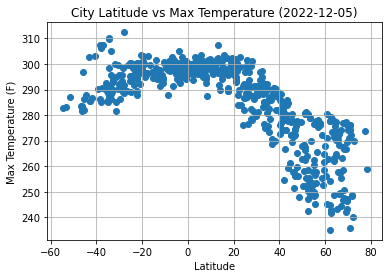

In [8]:
# Build scatter plot for latitude vs. temperature
#format the max date in the dataset as "runDate" for graph titles
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

# date_of_analysis = datetime.date(datetime.now())
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({runDate})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

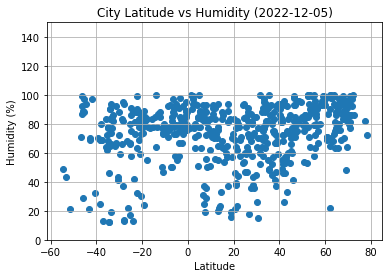

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values =city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

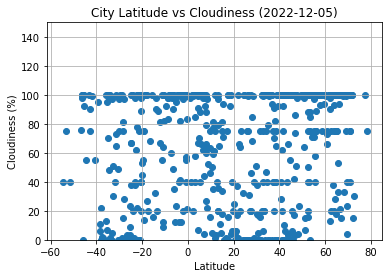

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values =city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude Vs. Wind Speed Plot

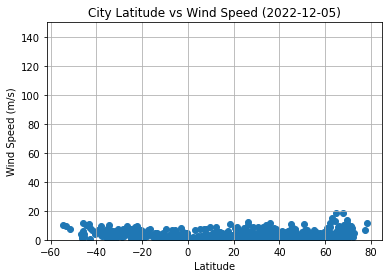

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values =city_data_df['Wind Speed']
# Incorporate the other graph properties

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({runDate})')
plt.ylim(0, 150)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buraydah,26.3260,43.9750,290.40,73,99,5.53,SA,1670272935
4,tuktoyaktuk,69.4541,-133.0374,247.15,64,40,11.83,CA,1670272956
5,puerto ayacucho,5.6639,-67.6236,303.47,63,66,2.61,VE,1670272985
7,bumba,2.1833,22.4667,293.77,97,100,1.18,CD,1670272986
8,akyab,20.1500,92.9000,295.81,83,25,3.03,MM,1670272987


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,288.25,94,0,0.89,ZA,1670272954
2,hermanus,-34.4187,19.2345,286.93,66,98,1.43,ZA,1670272772
3,rikitea,-23.1203,-134.9692,297.34,81,98,6.24,PF,1670272961
6,dutlwe,-23.9833,23.9000,298.83,13,20,6.40,BW,1670272986
12,ushuaia,-54.8000,-68.3000,282.94,49,40,10.29,AR,1670272827


### Temperature Vs. Latitude Linear Regression Plot

The r-value is: -0.8275200081361546
y = -0.69x + 306.14


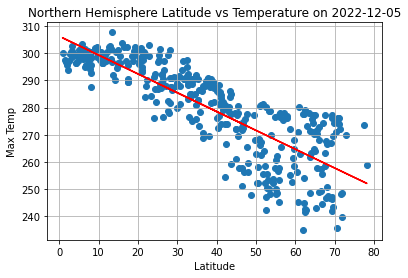

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# #tweak where the equation appears on the plot

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temperature on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Tempersature on {runDate}.png")



The r-value is: 0.5017925165954709
y = 0.22x + 300.18


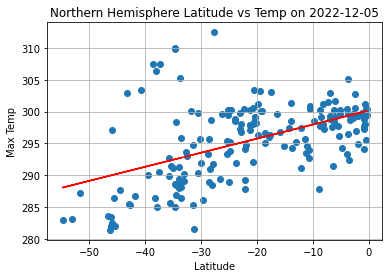

In [16]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png")

# plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()


### Discussion about the linear relationship: 

The above plots show  linear regression models between Maximum temperature and latitude for Northern and Southern Hemisphere cities. Results show a strong, negative correlation between Maximum tempreture and latitude for Northern Hemisphere cities. One possible implication is that the climate near the equator is hotter, so as we move north from the equator, the maximum Temperature (F) decreases. For the Southern Hemisphere cities, there is a weak positive relationship between Maximum Tempereture and latitude .

### Humidity Vs. Latitude Linear Regression Plot

The r-value is: 0.30770111670483585
y = 0.29x + 63.97


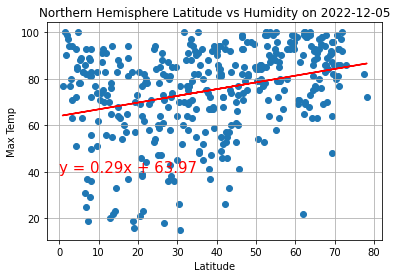

In [17]:
# Northern Hemisphere
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Humidity on {runDate}.png")


The r-value is: 0.2771923761173816
y = 0.42x + 80.58


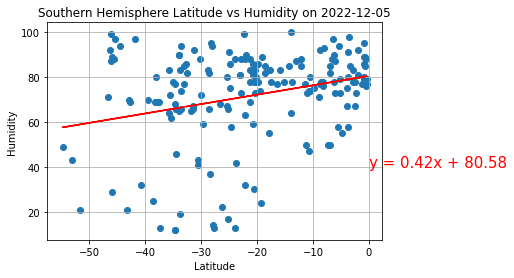

In [18]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png")


### Discussion about the linear relationship:
The above plots show linear regression models between Humidity (%) and Latitude for Northern  and Southern Hemisphere cities. Results indicate a weak positive relation between Humidity (%) and Latitude for both the Northern and Southern Hemisphere cities. 

### Cloudiness Vs. Latitude Linear Regression Plot

The r-value is: 0.2297680825396166
y = 0.43x + 45.86


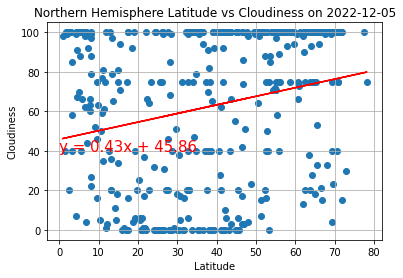

In [19]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png")

The r-value is: 0.2240067974541306
y = 0.62x + 74.65


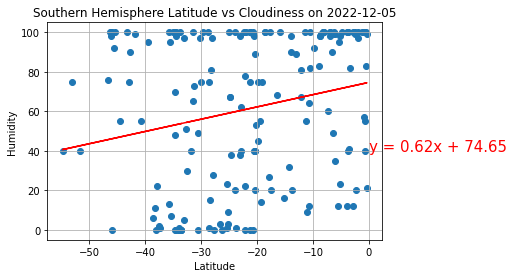

In [20]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png")

### Discussion about the linear relationship: 

The plots above depict linear regression models between Cloudiness (%) and Latitude for Northern and Southern Hemisphere cities. results from the data indicate very weak positive correlation between Cloudiness (%) and Latitude for the cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24245065429454168
y = 0.03x + 2.4


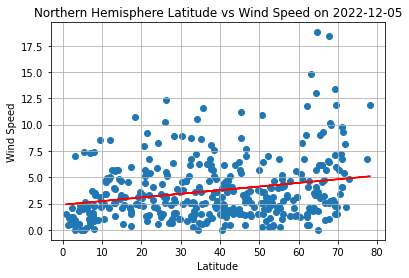

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png")

The r-value is: -0.41265175613009786
y = -0.08x + 2.31


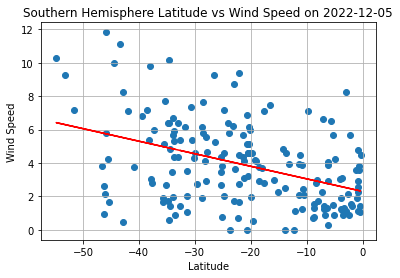

In [22]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png")

### Discussion about the linear relationship: 

The above plots depict linear regression models between Wind Speed (mph), and latitude for Northern and Southern Hemisphere cities. Results from the model indicate a weak to almsost non existent relationship for the Northern Hemisphere cities and a weak negative relation for the SOuthern Hemisphere cities